In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:

dataset=pd.read_csv('Data.csv')


In [147]:
df = pd.read_csv('datacleaning.csv')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
Unique_ID     11 non-null int64
Country       11 non-null object
Age           11 non-null int64
investment    10 non-null float64
porfit        11 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 520.0+ bytes


In [149]:
df

,Unique_ID,Country,Age,investment,porfit
0,1101,India,43,54000.0,YES
1,1102,Canada,34,45000.0,NO
2,1104,japan,36,46000.0,NO
3,1109,Canada,49,66000.0,YES
4,1107,India,28,58000.0,YES
5,1198,japan,31,47000.0,NO
6,1178,japan,28,NaN,YES
7,1134,Canada,51,63000.0,YES
8,1171,India,33,44000.0,NO
9,1105,japan,26,45000.0,NO


In [150]:
df.isnull().sum()

Unique_ID     0
Country       0
Age           0
investment    1
porfit        0
dtype: int64

In [151]:
df.dropna()

,Unique_ID,Country,Age,investment,porfit
0,1101,India,43,54000.0,YES
1,1102,Canada,34,45000.0,NO
2,1104,japan,36,46000.0,NO
3,1109,Canada,49,66000.0,YES
4,1107,India,28,58000.0,YES
5,1198,japan,31,47000.0,NO
7,1134,Canada,51,63000.0,YES
8,1171,India,33,44000.0,NO
9,1105,japan,26,45000.0,NO
10,1104,India,43,54000.0,YES


In [152]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['investment']])
df['investment'] = imputer.transform(df[['investment']])

In [126]:
df['investment']

0     54000.0
1     45000.0
2     46000.0
3     66000.0
4     58000.0
5     47000.0
6     52200.0
7     63000.0
8     44000.0
9     45000.0
10    54000.0
Name: investment, dtype: float64

In [127]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(df[['Age','investment']])

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [128]:
X

array([[ 0.77923237,  0.24712188],
       [-0.30730291, -0.98848754],
       [-0.06585062, -0.8511976 ],
       [ 1.50358922,  1.89460111],
       [-1.03165976,  0.79628163],
       [-0.66948133, -0.71390766],
       [-1.03165976,  0.        ],
       [ 1.7450415 ,  1.4827313 ],
       [-0.42802905, -1.12577747],
       [-1.27311204, -0.98848754],
       [ 0.77923237,  0.24712188]])

In [129]:
dataset=pd.read_csv('Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


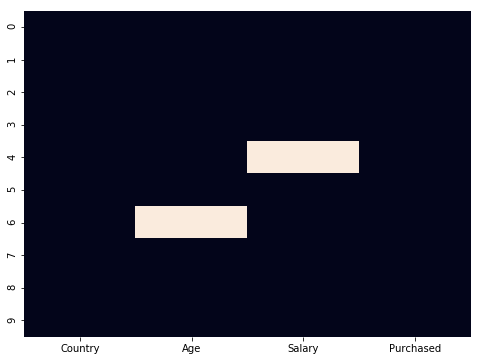

In [130]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.isnull(),cbar=False)

In [137]:
# importing one hot encoder from sklearn 
# There are changes in OneHotEncoder class 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
   
# creating one hot encoder object with categorical feature 0 
# indicating the first column 
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [2])], 
                                      remainder='passthrough') 
  
df1= np.array(columnTransformer.fit_transform(df), dtype = np.str)
df1 = pd.DataFrame(df)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1101,India,54000.0,YES
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1102,Canada,45000.0,NO
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1104,japan,46000.0,NO
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1109,Canada,66000.0,YES
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1107,India,58000.0,YES
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1198,japan,47000.0,NO
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1178,japan,52200.0,YES
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1134,Canada,63000.0,YES
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1171,India,44000.0,NO
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1105,japan,45000.0,NO


In [156]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [157]:
print("Number of Unique ID = ", len(df['Unique_ID'].unique()))
print("NUMBER of the Total ID= ", df.shape[0])
print("Duplicate ID = ",len(df['Unique_ID'])- len(df['Unique_ID'].unique()))

Number of Unique ID =  10
NUMBER of the Total ID=  11
Duplicate ID =  1


In [158]:
df.drop_duplicates(subset = 'Unique_ID', keep = 'first' ,inplace = True)

In [153]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
y  = df['profit']  
y  = le.fit_transform(df['profit'] ) 

KeyError: 'profit'